# Steam Flow Data Visualization

This notebook will display steam flow data for the specified date range and location

In [80]:
"""import libraries"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [81]:
df = pd.read_csv("sf_data.csv")#,sep=',',index_col="Date",parse_dates=True)
df.index = df['Date']
df['mwe_total'] = df['Unit1'] + df['Unit2']
df['sf_total'] = df['701'] + df['702']
df['sf_bo_total'] = df['701'] + df['702'] + df['701a'] + df['702a'] + df['701b'] + df['702b'] + \
                    df['701c'] + df['702c']
df['bo_total'] = df['701a'] + df['702a'] + df['701b'] + df['702b'] + df['701c'] + df['702c']
df['pad_e'] = df['301-302'] + df['303_304'] + df['305_306']
df['pad_hf'] = df['401_402'] + df['403_404'] + df['405']
df['sf_prs'] = df['pad_e'] + df['pad_hf'] + df['508']
df['diff_prs_if'] = df['sf_prs'] - df['sf_total']
df['diff_prs_bo'] = df['sf_prs'] - df['sf_bo_total']
df['pdiff_prs_if'] = 100 * (df['sf_prs'] - df['sf_total'])/df['sf_total']
df['pdiff_prs_bo'] = 100 * (df['sf_prs'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_wellhead'] = 1008.2
df['pdiff_bom_if'] = 100 * (df['bom_wellhead'] - df['sf_total'])/df['sf_total']
df['pdiff_bom_bo'] = 100 * (df['bom_wellhead'] - df['sf_bo_total'])/df['sf_bo_total']
df['bom_if'] = 977.95
df['bom_pad_e'] = 418.68
df['bom_pad_hf'] = 510.12
df['bom_pad_c'] = 79.2

In [82]:
def get_data(dates, full_df, cols):
    """create a df with the specified date range and variables to plot"""
    #Create a dataframe with the given date range as index
    df = pd.DataFrame(index=dates)
    #Read the WHP data from the .csv file
    df_temp = full_df[cols]
    #Join the given date_range data frame with the imported whp dataframe                    
    df = df.join(df_temp)
    return df

def plot_data(df, ylabel, title):
    #Define size of the plot
    matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
    """Plot stock WHP with a custom title and axis labels"""
    ax = df.plot(title=title, fontsize=12)
    ax.set_xlabel("Date", fontsize=16)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.grid(True)
    plt.xticks(rotation='vertical')
    plt.show()
    
def nan_outlier(group, stds):
    """This function will replace outlier with nan; use 1sd:68% 1.96sd:95% 3sd:99%"""
    pd.options.mode.chained_assignment = None  # default='warn'
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

In [83]:
"""Define Date Range Here"""
start_date = '2016-08-04 00:00:00'      
end_date = '2016-08-04 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')
%matplotlib inline
title = ""
yl_sf = "Steam Flow (TPH)"
yl_mwe = "MWe"
yl_diff = "% Difference"
yl_whp = "WHP (kscg)"

## Steam Flow at Pad E and Pad H+F

            pad_e      pad_hf     bom_pad_e    bom_pad_hf
count  144.000000  144.000000  1.440000e+02  1.440000e+02
mean   409.259264  325.749507  4.186800e+02  5.101200e+02
std      4.136051   78.585615  2.281673e-13  5.133764e-13
min    402.435867  247.821515  4.186800e+02  5.101200e+02
25%    405.977461  273.464275  4.186800e+02  5.101200e+02
50%    408.169628  299.200369  4.186800e+02  5.101200e+02
75%    412.660912  354.038694  4.186800e+02  5.101200e+02
max    420.140167  527.747543  4.186800e+02  5.101200e+02


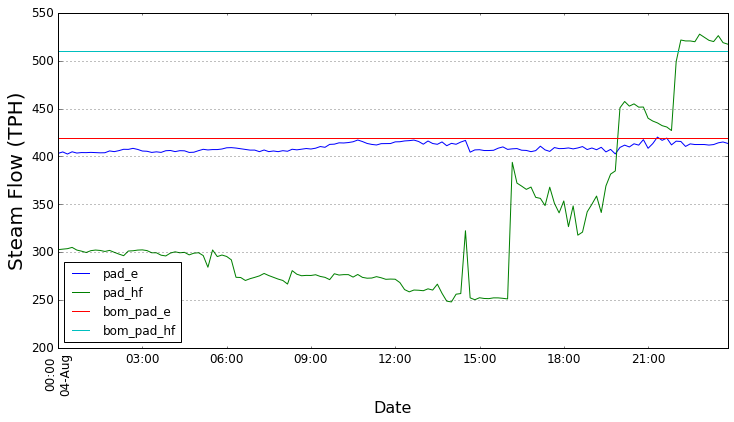

In [84]:
variables = ['Date', 'pad_e', 'pad_hf', 'bom_pad_e', 'bom_pad_hf']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Steam after Pad H and Pad F Separator Stations

          401_402     403_404         405
count  144.000000  144.000000  144.000000
mean   120.232561  145.793781   59.723166
std     11.363045   18.349366   82.973298
min     98.396896  117.560677   -0.574343
25%    107.784309  123.323351   -0.400606
50%    126.438732  148.248901   21.157984
75%    129.595398  164.660194  101.506674
max    134.043060  177.032898  267.255310


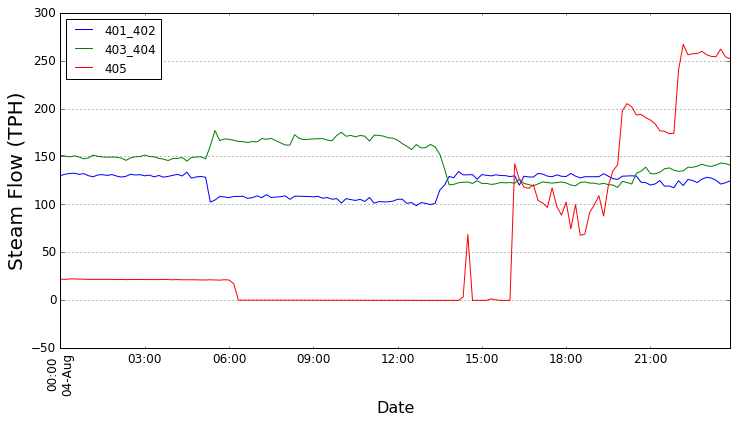

In [85]:
variables = ['Date', '401_402', '403_404', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Pad C Flow Meter

              508     bom_pad_c
count  144.000000  1.440000e+02
mean     5.956187  7.920000e+01
std      6.338071  9.982320e-14
min      0.086210  7.920000e+01
25%      0.540055  7.920000e+01
50%      6.774458  7.920000e+01
75%      8.828287  7.920000e+01
max     60.162731  7.920000e+01


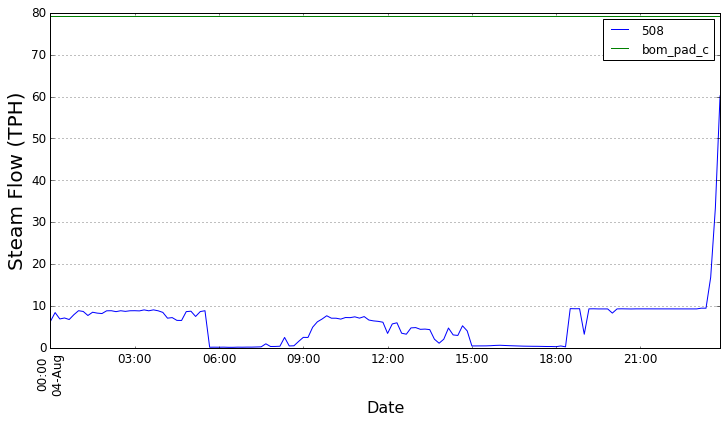

In [86]:
variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

## Is cycling steam flow data due to cycling WHP of PAL24D?

           PAL24D
count  144.000000
mean     7.907252
std      5.294510
min      1.619446
25%      4.895905
50%      5.118368
75%     10.620511
max     19.565937


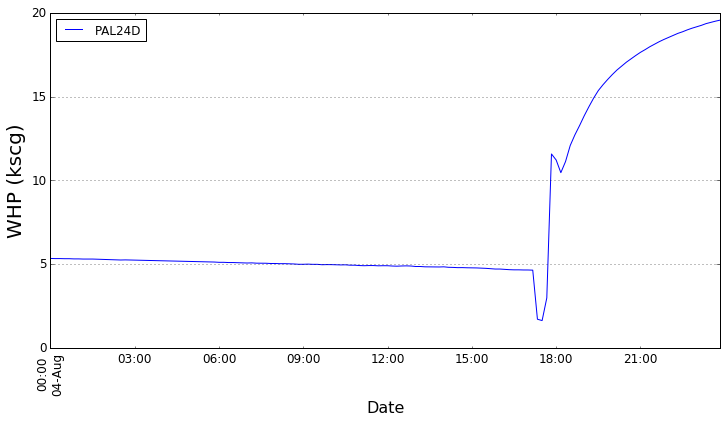

In [87]:
variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_whp, title)

## What is the correlation between Pad C steam flow and PAL24D WHP?

In [88]:
variables = ['Date', '508', 'PAL24D']
df_temp = get_data(dates, df, variables)
df_temp.corr()

,508,PAL24D
508,1.000000,0.505423
PAL24D,0.505423,1.000000


## Steam Flow - WHP trend BEFORE maintenance

               508     bom_pad_c
count  1152.000000  1.152000e+03
mean     85.917451  7.920000e+01
std      18.803678  1.691826e-12
min      61.817738  7.920000e+01
25%      68.774395  7.920000e+01
50%      82.936790  7.920000e+01
75%      98.733269  7.920000e+01
max     149.479614  7.920000e+01


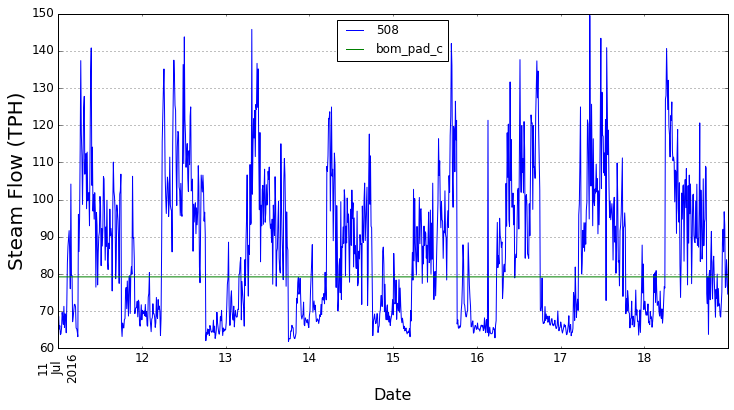

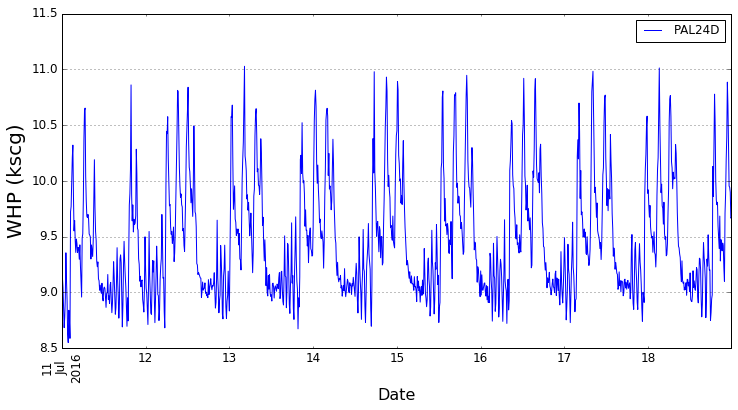

            PAL24D
count  1152.000000
mean      9.475337
std       0.516367
min       8.551404
25%       9.065684
50%       9.347069
75%       9.806219
max      11.027038


In [89]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-07-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Steam Flow - WHP trend AFTER maintenance

#### 508 flow meter std decreased from 18.8 to 6.5; mean decreased from 85.9 to 55

               508     bom_pad_c
count  1152.000000  1.152000e+03
mean     55.037121  7.920000e+01
std       6.508449  1.691826e-12
min      37.217323  7.920000e+01
25%      49.516374  7.920000e+01
50%      57.805058  7.920000e+01
75%      59.277765  7.920000e+01
max      83.549797  7.920000e+01


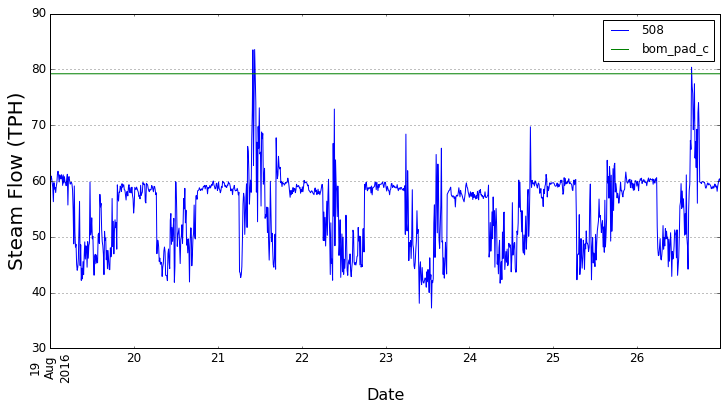

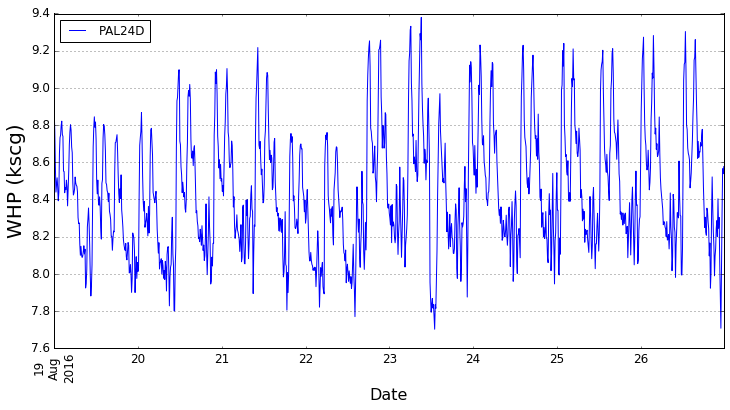

            PAL24D
count  1152.000000
mean      8.446130
std       0.327728
min       7.702615
25%       8.203902
50%       8.396196
75%       8.672827
max       9.379069


In [90]:
"""Define Date Range Here"""
start_date = '2016-08-19 00:00:00'      
end_date = '2016-08-26 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '508', 'bom_pad_c']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

variables = ['Date', 'PAL24D']
df_temp = get_data(dates, df, variables)
plot_data(df_temp, yl_whp, title)
print df_temp.describe()

## Pad F (SV 405) steam flow data BEFORE and AFTER maintenance

In [1]:
"""Define Date Range Here"""
start_date = '2016-07-11 00:00:00'      
end_date = '2016-07-18 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

"""Define Date Range Here"""
start_date = '2016-08-11 00:00:00'      
end_date = '2016-08-17 23:50:00'
dates = pd.date_range (start_date, end_date, freq='10min')

variables = ['Date', '405']
df_temp = get_data(dates, df, variables)
print df_temp.describe()
plot_data(df_temp, yl_sf, title)

NameError: name 'pd' is not defined

$$\pi = frac{C}{D}  $$